In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt

# apt-get : 패키지 설치 명령어
# -qq : 에러외의 메세지 숨기는 옵션키
!apt-get -qq install fonts-nanum

fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

Selecting previously unselected package fonts-nanum.
(Reading database ... 124950 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/visual.csv", encoding="utf-8-sig")

In [4]:
df['BRDCST_DE'] = pd.to_datetime(df['BRDCST_DE'])
df['요일'] = df['BRDCST_DE'].dt.day_name().replace({'Monday': 'Weekday', 'Tuesday': 'Weekday',
                                               'Wednesday': 'Weekday', 'Thursday': 'Weekday', 'Friday': 'Weekday'})
df

,BRDCST_DE,CHNNEL_NM,ADVRTS_MATR_NM,ADVRTS_BEGIN_TIME,ADVRTS_TIME,UNIT_ACCTO_ADVRTS_ODR,UNIT_ACCTO_ADVRTS_CO,INDUTY_SCLAS_NM,AREA_NM,ANALS_TRGET_NM,TVGRP_CO,frequency,TYPE_STR,CLASS,AD_POSITION_LABEL,요일
0,2023-01-01,KBS2,맥도날드 (애니메이션/RMHC하우스/행운버거),125138,30,3,3,패스트푸드점,서울,가구,1,0,프로,A,후,Sunday
1,2023-01-01,KBS2,맥도날드 (애니메이션/RMHC하우스/행운버거),125138,30,3,3,패스트푸드점,서울,개인,0,0,프로,A,후,Sunday
2,2023-01-01,KBS2,맥도날드 (애니메이션/RMHC하우스/행운버거),125138,30,3,3,패스트푸드점,경기·인천,가구,1,0,프로,A,후,Sunday
3,2023-01-01,KBS2,맥도날드 (애니메이션/RMHC하우스/행운버거),125138,30,3,3,패스트푸드점,경기·인천,개인,0,0,프로,A,후,Sunday
4,2023-01-01,KBS2,맥도날드 (애니메이션/RMHC하우스/행운버거),125138,30,3,3,패스트푸드점,경기·인천,유료매체가입가구,1,0,프로,A,후,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133607,2023-12-26,SBS,진천청주왕족발보쌈 (백년가게의맛/건강하고맛있게),73313,20,2,3,대중음식점,충청북도,유료매체가입개인,3,1,토막,B,중간,Weekday
1133608,2023-12-26,SBS,맥도날드 (NCT도영/행운버거를구매해주신/감사합니다),73530,30,1,5,패스트푸드점,제주도,가구,0,1,토막,B,중간,Weekday
1133609,2023-12-26,SBS,맥도날드 (NCT도영/행운버거를구매해주신/감사합니다),73530,30,1,5,패스트푸드점,제주도,개인,0,1,토막,B,중간,Weekday
1133610,2023-12-26,SBS,맥도날드 (NCT도영/행운버거를구매해주신/감사합니다),73530,30,1,5,패스트푸드점,제주도,유료매체가입가구,0,1,토막,B,중간,Weekday


In [6]:
df = df[['TYPE_STR', 'CLASS', '요일', 'TVGRP_CO']].dropna()
df.head()

,TYPE_STR,CLASS,요일,TVGRP_CO
0,프로,A,Sunday,1
1,프로,A,Sunday,0
2,프로,A,Sunday,1
3,프로,A,Sunday,0
4,프로,A,Sunday,1


In [7]:
df1 = df[df['요일'] == 'Weekday']
df2 = df[df['요일'] == 'Saturday']
df3 = df[df['요일'] == 'Sunday']

<ipython-input-8-e70adbb3ec8d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df1, x='CLASS', y='TVGRP_CO', order=['SA', 'A', 'B', 'C'], palette='Set2')


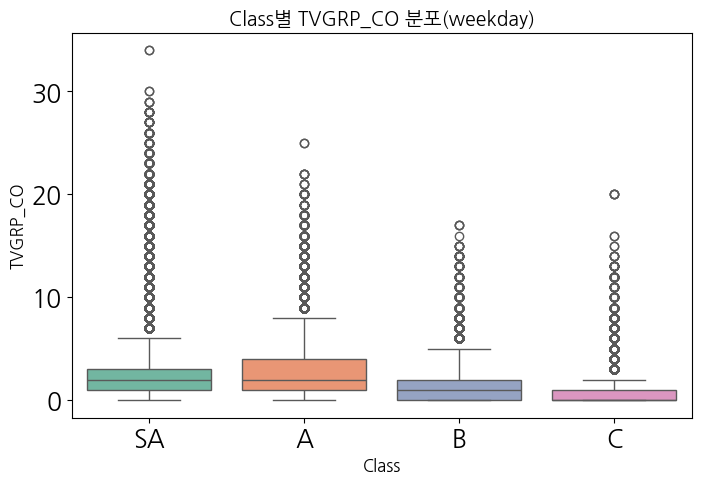

In [8]:
plt.figure(figsize=(8, 5))

# class별 TVGRP_CO 분포 박스플롯
sns.boxplot(data=df1, x='CLASS', y='TVGRP_CO', order=['SA', 'A', 'B', 'C'], palette='Set2')

# 그래프 제목 & 라벨 추가
plt.title("Class별 TVGRP_CO 분포(weekday)", fontsize=14)
plt.xlabel("Class", fontsize=12)
plt.ylabel("TVGRP_CO", fontsize=12)

# 그래프 출력
plt.show()

<ipython-input-9-c7f8b41cd6be>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df2, x='CLASS', y='TVGRP_CO', order=['SA', 'A', 'B', 'C'], palette='Set2')


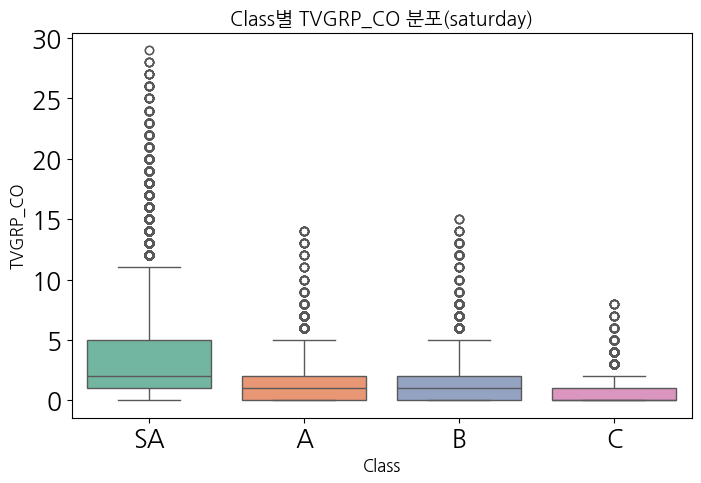

In [9]:
plt.figure(figsize=(8, 5))

# class별 TVGRP_CO 분포 박스플롯
sns.boxplot(data=df2, x='CLASS', y='TVGRP_CO', order=['SA', 'A', 'B', 'C'], palette='Set2')

# 그래프 제목 & 라벨 추가
plt.title("Class별 TVGRP_CO 분포(saturday)", fontsize=14)
plt.xlabel("Class", fontsize=12)
plt.ylabel("TVGRP_CO", fontsize=12)

# 그래프 출력
plt.show()

<ipython-input-11-e36cdae594c3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df3, x='CLASS', y='TVGRP_CO', order=['SA', 'A', 'B', 'C'], palette='Set2')


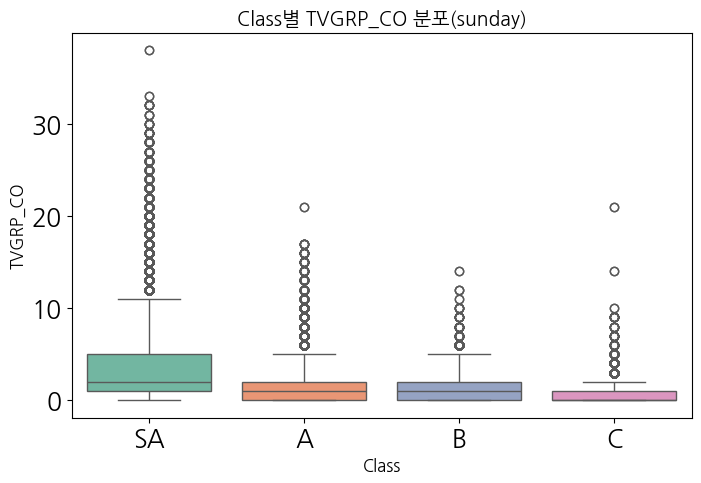

In [11]:
plt.figure(figsize=(8, 5))

# class별 TVGRP_CO 분포 박스플롯
sns.boxplot(data=df3, x='CLASS', y='TVGRP_CO', order=['SA', 'A', 'B', 'C'], palette='Set2')

# 그래프 제목 & 라벨 추가
plt.title("Class별 TVGRP_CO 분포(sunday)", fontsize=14)
plt.xlabel("Class", fontsize=12)
plt.ylabel("TVGRP_CO", fontsize=12)

# 그래프 출력
plt.show()

<ipython-input-18-05cd96c1868d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df1, x='TYPE_STR', y='TVGRP_CO', palette='Set2')


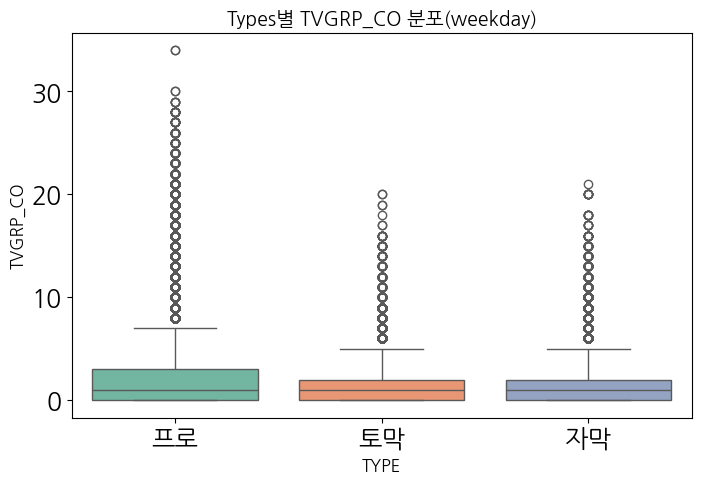

In [18]:
plt.figure(figsize=(8, 5))

# type별 TVGRP_CO 분포 박스플롯
sns.boxplot(data=df1, x='TYPE_STR', y='TVGRP_CO', palette='Set2')

# 그래프 제목 & 라벨 추가
plt.title("Types별 TVGRP_CO 분포(weekday)", fontsize=14)
plt.xlabel("TYPE", fontsize=12)
plt.ylabel("TVGRP_CO", fontsize=12)

# 그래프 출력
plt.show()

<ipython-input-19-72ae70e3fc1c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df2, x='TYPE_STR', y='TVGRP_CO', palette='Set2')


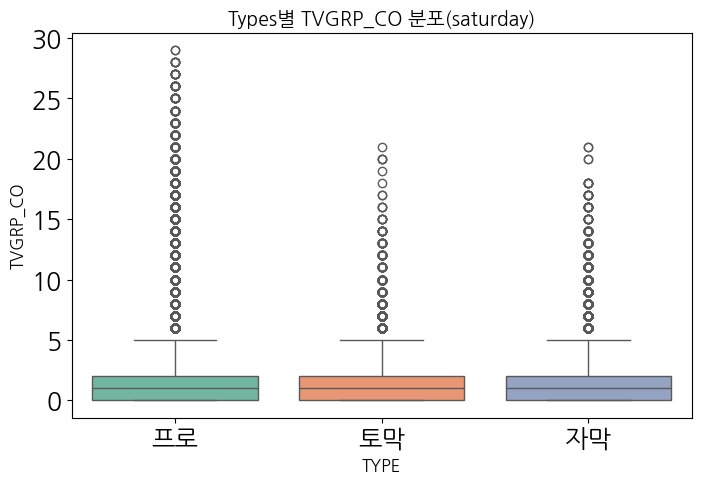

In [19]:
plt.figure(figsize=(8, 5))

# type별 TVGRP_CO 분포 박스플롯
sns.boxplot(data=df2, x='TYPE_STR', y='TVGRP_CO', palette='Set2')

# 그래프 제목 & 라벨 추가
plt.title("Types별 TVGRP_CO 분포(saturday)", fontsize=14)
plt.xlabel("TYPE", fontsize=12)
plt.ylabel("TVGRP_CO", fontsize=12)

# 그래프 출력
plt.show()

<ipython-input-21-dffeedf0d5a3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df3, x='TYPE_STR', y='TVGRP_CO', palette='Set2')


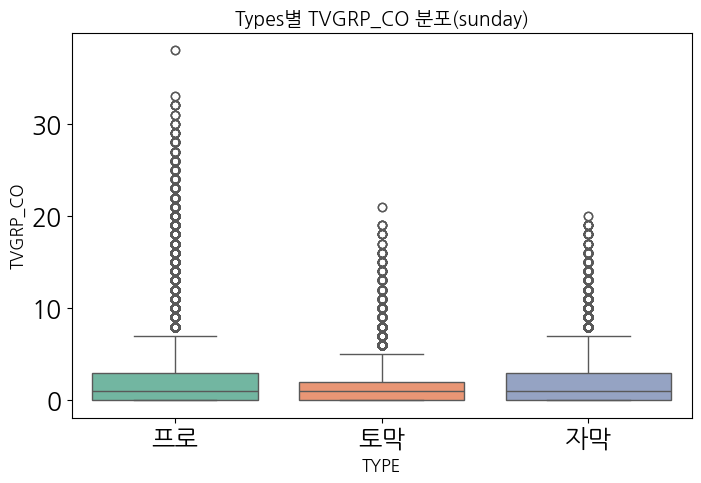

In [21]:
plt.figure(figsize=(8, 5))

# type별 TVGRP_CO 분포 박스플롯
sns.boxplot(data=df3, x='TYPE_STR', y='TVGRP_CO', palette='Set2')

# 그래프 제목 & 라벨 추가
plt.title("Types별 TVGRP_CO 분포(sunday)", fontsize=14)
plt.xlabel("TYPE", fontsize=12)
plt.ylabel("TVGRP_CO", fontsize=12)

# 그래프 출력
plt.show()

<ipython-input-22-139b4b37893f>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df1, x='CLASS', y='TVGRP_CO', hue='TYPE_STR', order=['C', 'B', 'A', 'SA'], ci=None, estimator='mean', palette='Set2')


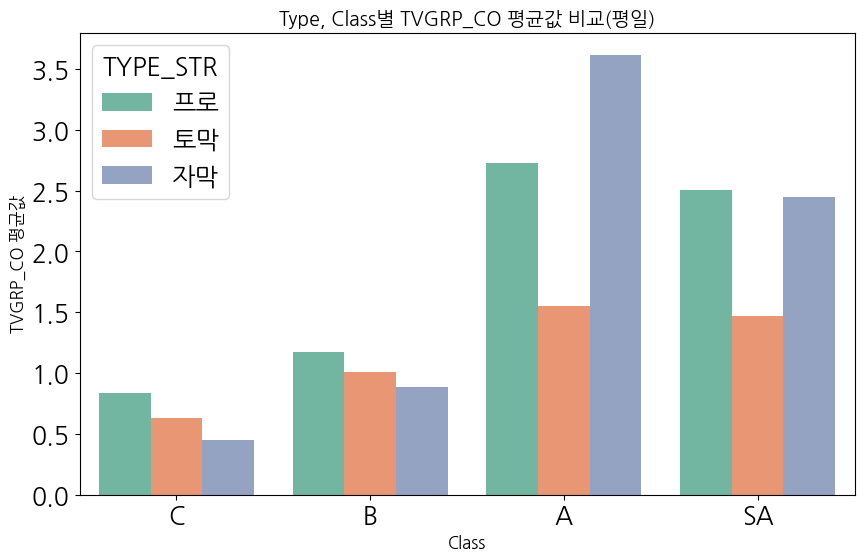

In [22]:
plt.figure(figsize=(10, 6))

# x축에 'class' 순서를 'C', 'B', 'A', 'SA'로 지정
sns.barplot(data=df1, x='CLASS', y='TVGRP_CO', hue='TYPE_STR', order=['C', 'B', 'A', 'SA'], ci=None, estimator='mean', palette='Set2')

# 그래프 제목 & 라벨 추가
plt.title("Type, Class별 TVGRP_CO 평균값 비교(평일)", fontsize=14)
plt.xlabel("Class", fontsize=12)
plt.ylabel("TVGRP_CO 평균값", fontsize=12)
plt.show()

<ipython-input-23-23bc95c01718>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df2, x='CLASS', y='TVGRP_CO', hue='TYPE_STR', order=['C', 'B', 'A', 'SA'], ci=None, estimator='mean', palette='Set2')


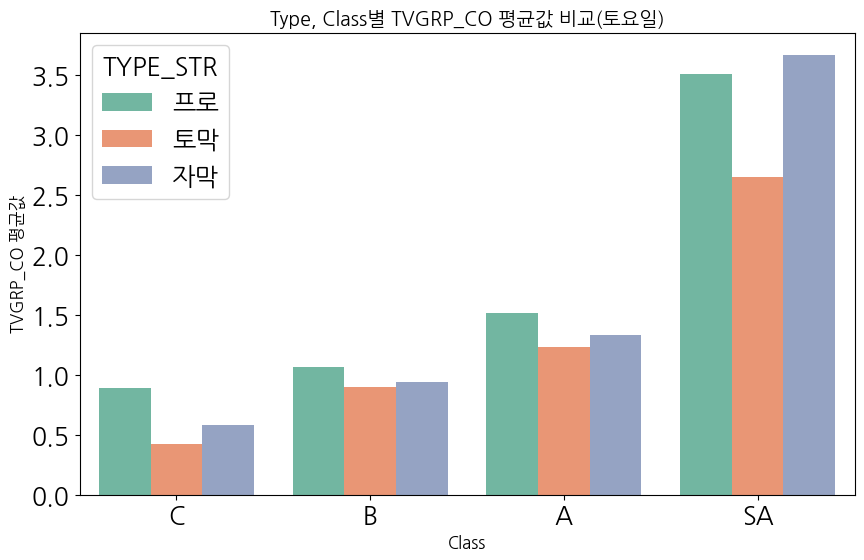

In [23]:
plt.figure(figsize=(10, 6))

# x축에 'class' 순서를 'C', 'B', 'A', 'SA'로 지정
sns.barplot(data=df2, x='CLASS', y='TVGRP_CO', hue='TYPE_STR', order=['C', 'B', 'A', 'SA'], ci=None, estimator='mean', palette='Set2')

# 그래프 제목 & 라벨 추가
plt.title("Type, Class별 TVGRP_CO 평균값 비교(토요일)", fontsize=14)
plt.xlabel("Class", fontsize=12)
plt.ylabel("TVGRP_CO 평균값", fontsize=12)
plt.show()

<ipython-input-24-7295f69de118>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df3, x='CLASS', y='TVGRP_CO', hue='TYPE_STR', order=['C', 'B', 'A', 'SA'], ci=None, estimator='mean', palette='Set2')


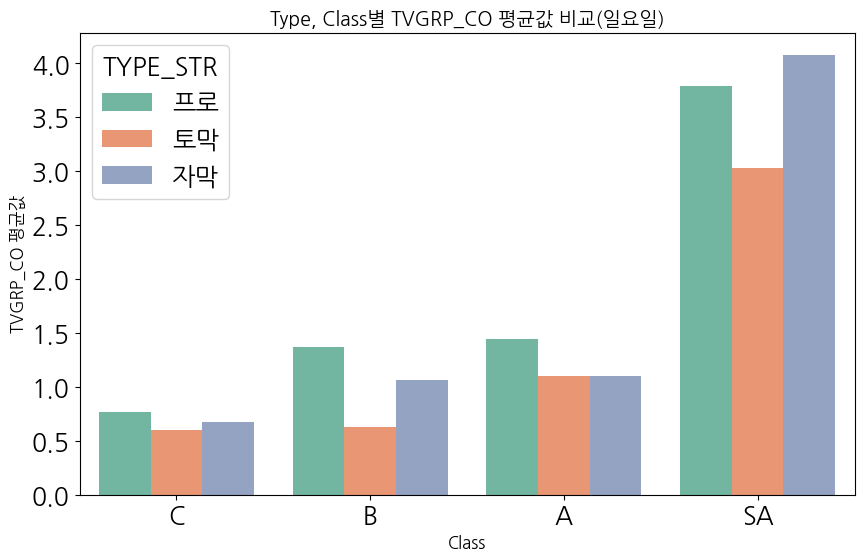

In [24]:
plt.figure(figsize=(10, 6))

# x축에 'class' 순서를 'C', 'B', 'A', 'SA'로 지정
sns.barplot(data=df3, x='CLASS', y='TVGRP_CO', hue='TYPE_STR', order=['C', 'B', 'A', 'SA'], ci=None, estimator='mean', palette='Set2')

# 그래프 제목 & 라벨 추가
plt.title("Type, Class별 TVGRP_CO 평균값 비교(일요일)", fontsize=14)
plt.xlabel("Class", fontsize=12)
plt.ylabel("TVGRP_CO 평균값", fontsize=12)
plt.show()

<ipython-input-25-1c9ad8ea1298>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='요일', y='TVGRP_CO', order=['Weekday', 'Saturday', 'Sunday'], palette='Set2')


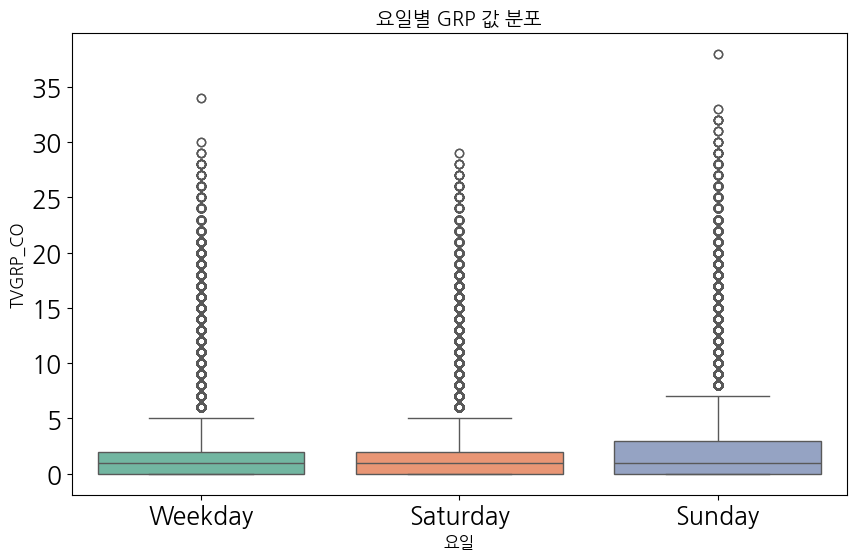

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='요일', y='TVGRP_CO', order=['Weekday', 'Saturday', 'Sunday'], palette='Set2')

# 그래프 제목 & 라벨 추가
plt.title("요일별 GRP 값 분포", fontsize=14)
plt.xlabel("요일", fontsize=12)
plt.ylabel("TVGRP_CO", fontsize=12)
plt.show()